In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

from astropy.cosmology import Planck18
import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [3]:
L_X = 40 + np.log10(1.2)

run_name = 'LX_effects_120'

os.environ['DM21CM_DATA_DIR'] = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/zf01/data'

# set global params
p21c.global_params.CLUMPING_FACTOR = 1.
#p21c.global_params.Pop2_ion = 0.

return_dict = evolve(
    run_name = run_name,
    z_start = 45.,
    z_end = 5.,
    subcycle_factor = 1,
    max_n_shell = None,

    #dm_params = None,
    no_injection = True,
    use_DH_init = False,
    enable_elec = False,
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 32,
            BOX_LEN = 32 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    p21c_astro_params = p21c.AstroParams(L_X = L_X), # log10 value
)

np.save(f'{WDIR}/outputs/dm21cm/{run_name}_records.npy', return_dict['records'])

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1597+g077c43b.d20231125
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/LX_effects_120
100%|██████████| 204/204 [02:29<00:00,  1.36it/s]

21cmFAST    : 0.7332 +/- 0.1317 s * 203 steps : 148.8352 s


In [4]:
rec_base = np.load(f'{WDIR}/outputs/dm21cm/LX_effects_base_records.npy', allow_pickle=True).item()
rec_var = np.load(f'{WDIR}/outputs/dm21cm/LX_effects_120_records.npy', allow_pickle=True).item()

[None]

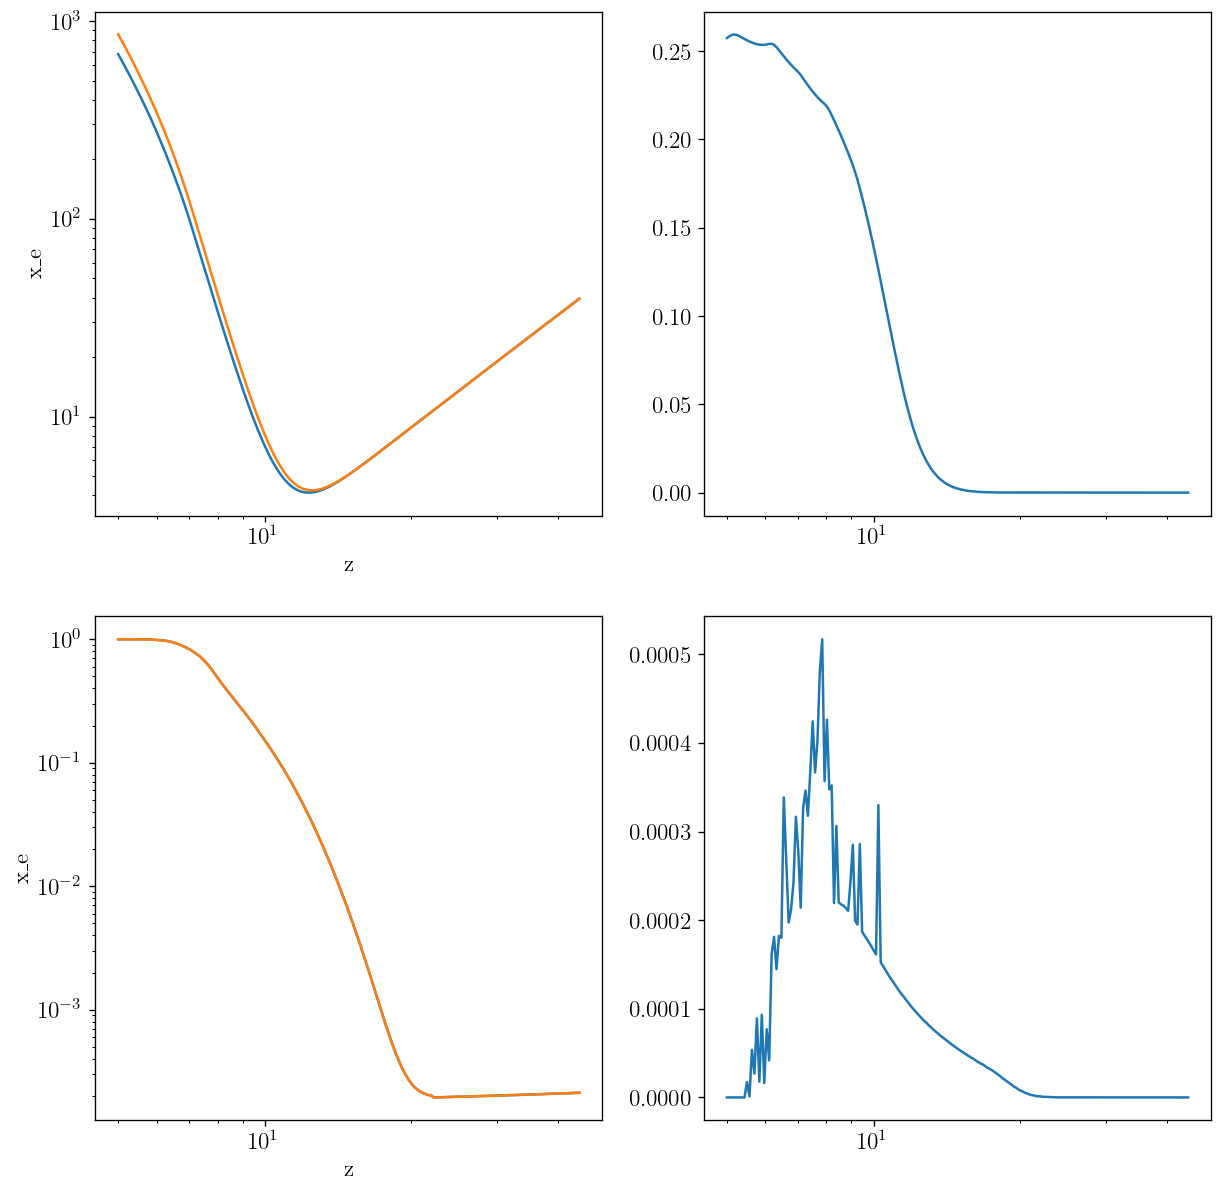

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

ax = axs[0,0]
ax.plot(rec_base['z'], rec_base['T_k'], label='base')
ax.plot(rec_var['z'], rec_var['T_k'], label='var')
ax.set(xscale='log', yscale='log')
ax.set(xlabel='z', ylabel='x_e')

ax = axs[0,1]
ax.plot(rec_base['z'], (rec_var['T_k']-rec_base['T_k'])/rec_base['T_k'])
ax.set(xscale='log')

ax = axs[1,0]
ax.plot(rec_base['z'], rec_base['1-x_H'], label='base')
ax.plot(rec_var['z'], rec_var['1-x_H'], label='var')
ax.set(xscale='log', yscale='log')
ax.set(xlabel='z', ylabel='x_e')

ax = axs[1,1]
ax.plot(rec_base['z'], (rec_var['1-x_H']-rec_base['1-x_H'])/rec_base['1-x_H'])
ax.set(xscale='log')

In [ ]:
rec_base['x_e']